# Jadon Sancho - Passing stats

## Summary of results

### Pass Completion

**Total passes:** 1316<br>
**Passes from the left:** 624<br>
**Passes from the center:** 241<br>
**Passes from the right:** 451<br>
<br>
**Successful passes:** 1065<br>
**Successful passes from the left:** 511<br>
**Successful passes from the center:** 192<br>
**Successful passes from the right:** 362
<br><br>
**Pass completion rate:** 80.9%<br>
**Pass completion left:** 81.9%<br>
**Pass completion center:** 79.7%<br>
**Pass completion right:** 80.3%
<br><br>
Pass completion seems to be virtually unaffected by the starting position of the pass.
<br>

### Progressive Pass Completion
**Progressive Passes Attempted:** 217<br>
**Progressive Passes Attempted from the left:** 113<br>
**Progressive Passes Attempted from the center:** 30<br>
**Progressive Passes Attempted from the right:** 74
<br><br>

**Successful progressive passes:** 140<br>
**Successful progressive passes from the left:** 74<br>
**Successful progressive passes from the center:** 21<br>
**Successful progressive passes from the right:** 45
<br><br>

**Progressive pass completion rate:** 64.5<br>
**Progressive pass completion left:** 65.5<br>
**Progressive pass completion center:** 70.0<br>
**Progressive pass completion right:** 60.8
<br><br>
Jadon Sancho had most success from the middle of the pitch, followed by the left, then right. 

### Progressive Passes per Pass Attempt
**Successful progressive passes per pass attempt:** 10.64%<br>
**Successful progressive passes per pass attempt (left):** 11.86%<br>
**Successful progressive passes per pass attempt (center):** 8.71%<br>
**Successful progressive passes per pass attempt (right):** 9.98%
<br><br>
Jadon Sancho is most likely to complete a successfull pass from the left than from any other position on the pitch.
<br><br>

In [1]:
from mplsoccer.pitch import Pitch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Read in the data
DF = pd.read_csv('sancho_bundesliga.csv')
del DF['Competition']
del DF['Opposition']
del DF['isTop6']
del DF['isGoal']
DF

,Event ID,Player,Minute,Second,X,Y,Type,Outcome,endX,endY,isAssist,Set Piece,Left,Center,Right
0,15,346300,0,28.0,75.0,28.8,Pass,Pos,65.5,50.9,Blank,Blank,Blank,Blank,Yes
1,46,346300,2,4.0,44.6,26.8,Pass,Pos,34.8,25.5,Blank,Blank,Blank,Blank,Yes
2,98,346300,4,21.0,56.4,88.0,Pass,Pos,54.5,96.6,Blank,Blank,Yes,Blank,Blank
3,101,346300,4,31.0,56.2,95.0,Dispossessed,Neg,-1.0,-1.0,Blank,Blank,Yes,Blank,Blank
4,104,346300,4,33.0,57.6,94.2,Dispossessed,Neg,-1.0,-1.0,Blank,Blank,Yes,Blank,Blank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,1513,346300,82,NaN,79.6,4.1,OffsideGiven,Neg,-1.0,-1.0,Blank,Blank,Blank,Blank,Yes
2075,1514,346300,82,24.0,99.5,0.5,Pass,Neg,89.4,53.7,Blank,Corner,Blank,Blank,Yes
2076,1519,346300,82,43.0,87.3,13.7,Pass,Pos,81.8,37.7,Blank,Blank,Blank,Blank,Yes
2077,1553,346300,85,20.0,70.4,74.0,Foul,Pos,-1.0,-1.0,Blank,Blank,Yes,Blank,Blank


In [3]:
#Filtering out actions that are not passes
passes = DF[DF['Type']=='Pass']
passes = passes[passes['Set Piece']=='Blank']
passes

,Event ID,Player,Minute,Second,X,Y,Type,Outcome,endX,endY,isAssist,Set Piece,Left,Center,Right
0,15,346300,0,28.0,75.0,28.8,Pass,Pos,65.5,50.9,Blank,Blank,Blank,Blank,Yes
1,46,346300,2,4.0,44.6,26.8,Pass,Pos,34.8,25.5,Blank,Blank,Blank,Blank,Yes
2,98,346300,4,21.0,56.4,88.0,Pass,Pos,54.5,96.6,Blank,Blank,Yes,Blank,Blank
5,145,346300,6,37.0,73.2,74.5,Pass,Pos,94.2,76.4,Blank,Blank,Yes,Blank,Blank
6,179,346300,8,40.0,43.0,96.9,Pass,Pos,58.2,92.9,Blank,Blank,Yes,Blank,Blank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,1389,346300,73,33.0,45.9,77.8,Pass,Pos,56.9,95.3,Blank,Blank,Yes,Blank,Blank
2064,1397,346300,75,6.0,56.6,92.0,Pass,Pos,32.5,59.7,Blank,Blank,Yes,Blank,Blank
2065,1404,346300,75,27.0,64.7,32.8,Pass,Pos,68.8,11.3,Blank,Blank,Blank,Yes,Blank
2067,1478,346300,80,21.0,70.3,54.9,Pass,Neg,84.8,52.2,Blank,Blank,Blank,Yes,Blank


In [4]:
#pass completion stats

Total_passes = passes.X.count()

passes_from_left = passes.Left.value_counts()['Yes']
passes_from_center = passes.Center.value_counts()['Yes']
passes_from_right = passes.Right.value_counts()['Yes']

successful_passes = passes.Outcome.value_counts()['Pos']

#x = (test['Sex'].eq('female') & test['Pclass'].eq(3)).sum()

sP_left = (passes['Outcome'].eq('Pos') & passes['Left'].eq('Yes')).sum()
sP_center = (passes['Outcome'].eq('Pos') & passes['Center'].eq('Yes')).sum()
sP_right = (passes['Outcome'].eq('Pos') & passes['Right'].eq('Yes')).sum()

print('Pass completion rate:', (successful_passes/Total_passes)*100)
print('\n')
print('Total passes', Total_passes)
print('Passes from the left:', passes_from_left)
print('Passes from the center:', passes_from_center)
print('Passes from the right:', passes_from_right)
print('\n')
print('Successful passes:', successful_passes)
print('Successful passes from the left:', sP_left)
print('Successful passes from the center:', sP_center)
print('Successful passes from the right:', sP_right)
print('\n')
print('Pass completion left:', (sP_left/passes_from_left)*100)
print('Pass completion center:', (sP_center/passes_from_center)*100)
print('Pass completion right:', (sP_right/passes_from_right)*100)

Pass completion rate: 80.92705167173251


Total passes 1316
Passes from the left: 624
Passes from the center: 241
Passes from the right: 451


Successful passes: 1065
Successful passes from the left: 511
Successful passes from the center: 192
Successful passes from the right: 362


Pass completion left: 81.89102564102564
Pass completion center: 79.66804979253112
Pass completion right: 80.26607538802661


Text(0.5, 1.0, 'Sancho passes in the Bundesliga last season')

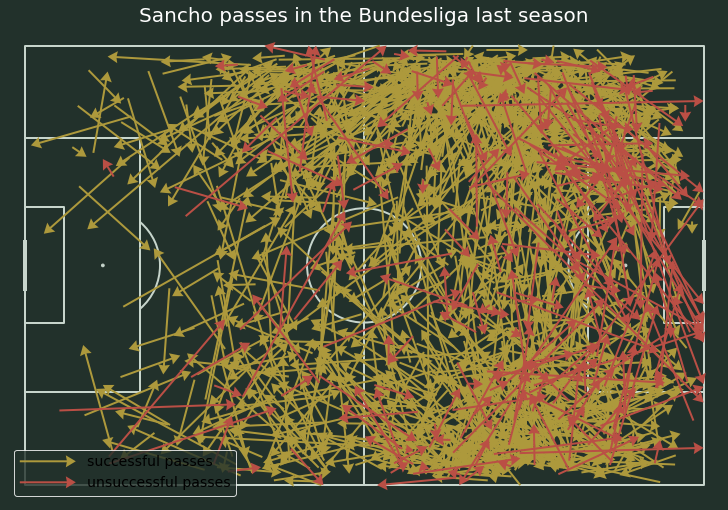

In [5]:
#Code to plot Sancho's passmap

pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

mask_incomplete = []
mask_prog = []
mask_complete = []
mask_prog_failed = []


for i in range(len(passes['X'])):
    if passes['Outcome'].iloc[i]=='Pos':
        mask_complete.append(True)
    else:
        mask_complete.append(False)
        
    if passes['Outcome'].iloc[i]=='Neg':
        mask_incomplete.append(True)
    else:
        mask_incomplete.append(False)
            
            
# Plot the completed passes            
pitch.arrows(passes[mask_complete].X, passes[mask_complete].Y,
             passes[mask_complete].endX, passes[mask_complete].endY, width=2,
             headwidth=6, headlength=5, color='#ad993c', ax=ax, label='successful passes')

# Plot unsuccessful passes
pitch.arrows(passes[mask_incomplete].X, passes[mask_incomplete].Y,
             passes[mask_incomplete].endX, passes[mask_incomplete].endY, width=2,
             headwidth=6, headlength=5, color='#ba4f45', ax=ax, label='unsuccessful passes')

# setup the legend
ax.legend(facecolor='#22312b', handlelength=4, edgecolor='White', fontsize=14, loc='lower left')

# Set the title
ax.set_title('Sancho passes in the Bundesliga last season', fontsize=20, color='White')

In [6]:
#Code here adds a coulmn for progressive passes

'''
A pass is considered a progressive pass:

1) if the starting position of the pass in in the opposition half
In this case, if the pass move the ball closer to goal by 25% it is considered a progressive passs

2) if the starting position is in player's half:
In this case, the player needs to move the ball closer to the goal by 40% for it to be considered a progressive pass

Note: Any pass from a set piece is automatically deemed as not a progressive pass

'''

#Used the variable goal to assign coordinates to the location of opposition goal
goal = (100, 50)

progressive = []
diff = []
  
for i in range(len(passes['Type'])):
    start_x = passes['X'].iloc[i]
    start_y = passes['Y'].iloc[i]
    
    start_x_diff = goal[0] - start_x
    start_y_diff = goal[1] - start_y
    start_diff = math.hypot(start_x_diff, start_y_diff)
    
    end_x = passes['endX'].iloc[i]
    end_y = passes['endY'].iloc[i]
    
    end_x_diff = goal[0] - end_x
    end_y_diff = goal[1] - end_y
    end_diff = math.hypot(end_x_diff, end_y_diff)
    
    per_diff = ((start_diff-end_diff)/start_diff)*100
    
    diff.append(per_diff)
    
    #Code to assign the value 'no' to set pieces
    if passes['Set Piece'].iloc[i]!='Blank':
        progressive.append('No')
    
    #code to determine whether a pass initiated in the opposition half is profressive or not
    elif start_x > 50:
        if end_diff <= (0.75 * start_diff):
            if passes['Outcome'].iloc[i]=='Pos':
                progressive.append('Yes')
            elif passes['Outcome'].iloc[i]=='Neg':
                progressive.append('Failed')
                
        else:
            progressive.append('No')
    
    #code to determine whether a pass initiated in the player's half is profressive or not            
    else:
        if end_diff <= (0.6 * start_diff):
            if passes['Outcome'].iloc[i]=='Pos':
                progressive.append('Yes')
            elif passes['Outcome'].iloc[i]=='Neg':
                progressive.append('Failed')
        else:
            progressive.append('No')
            
    expected_values = ['Yes', 'No', 'Failed']
    print(diff[i])        
    if progressive[i] not in expected_values:
        print('index '+ str(i) + ': Error')
    else:
        print('index ' + str(i) + ': ' + progressive[i])

print(len(diff))
print(len(progressive))
#print(diff)
#print(progressive)

passes['Difference'] = diff
passes['isProgressive'] = progressive
passes.head(55)
#passes.tail(22)

-5.287238677562098
index 0: No
-15.966211075536279
index 1: No
-12.610825329720129
index 2: No
25.560848559023114
index 3: Yes
18.85492379568175
index 4: No
-5.606359998879688
index 5: No
-16.797405817623265
index 6: No
13.030066760541818
index 7: No
-9.773211615447993
index 8: No
-12.941473110693591
index 9: No
-15.077449033515489
index 10: No
20.448000573223364
index 11: No
-15.036166744527058
index 12: No
18.711584703464368
index 13: No
-40.330311530500616
index 14: No
-3.278071310929843
index 15: No
6.955775432521081
index 16: No
-12.669565925719958
index 17: No
-24.5324001768619
index 18: No
-1.0786547243914293
index 19: No
12.418163019219543
index 20: No
12.942814408249179
index 21: No
-20.364543791213798
index 22: No
17.109155481136597
index 23: No
-5.424911338265445
index 24: No
35.08367539820799
index 25: Yes
-29.820509905236037
index 26: No
-23.54985043320435
index 27: No
16.120060455538397
index 28: No
-28.0225945139863
index 29: No
-20.03113072813188
index 30: No
-26.619124

index 452: No
20.009412896211927
index 453: No
12.926590271357119
index 454: No
39.89513427908978
index 455: Failed
-70.87620266682254
index 456: No
-10.357891298805038
index 457: No
-62.114266622552975
index 458: No
40.041601529238505
index 459: Failed
-10.603489118127332
index 460: No
-19.6780752003789
index 461: No
74.71855128871945
index 462: Failed
35.51062119386742
index 463: Yes
8.82448502601004
index 464: No
31.86271883777475
index 465: Yes
-12.771838299439409
index 466: No
9.122592950315564
index 467: No
50.13693037225513
index 468: Failed
8.059903517205584
index 469: No
0.02955316154358593
index 470: No
43.157807049259596
index 471: Yes
-0.21085611731967613
index 472: No
32.95042586328585
index 473: Yes
10.900688673141353
index 474: No
16.206453255373695
index 475: No
13.241980358678465
index 476: No
9.027576643020423
index 477: No
-22.227833209543988
index 478: No
11.074198462395698
index 479: No
-15.851200122637463
index 480: No
6.32376526407348
index 481: No
3.177081806778

index 702: Yes
-14.322603487620245
index 703: No
-8.038484751094693
index 704: No
28.94107753903516
index 705: Failed
-7.112557346359541
index 706: No
15.79011825213119
index 707: No
46.445212389129686
index 708: Failed
-19.48409188865872
index 709: No
-8.97296956659639
index 710: No
-13.33311735973546
index 711: No
-1.6963398696052328
index 712: No
18.04314451467508
index 713: No
9.974920119923103
index 714: No
-12.967756810109385
index 715: No
11.845923050133292
index 716: No
9.70135021028191
index 717: No
36.36953548962359
index 718: Failed
17.649602945706704
index 719: No
-1.715957038684196
index 720: No
13.525535492289679
index 721: No
25.55515714493482
index 722: No
0.6063338885072699
index 723: No
-7.5531216591437635
index 724: No
20.401012512452333
index 725: No
1.0921048133551972
index 726: No
24.464309273100206
index 727: No
7.79337233031398
index 728: No
20.157961773437492
index 729: No
5.952635891549243
index 730: No
-3.541717417865109
index 731: No
71.32689000934978
index 

-4.989289759692927
index 1042: No
-6.759219106349453
index 1043: No
16.396237833286932
index 1044: No
-12.6744761348121
index 1045: No
2.2282787426532686
index 1046: No
77.49931315087917
index 1047: Yes
13.937595456774076
index 1048: No
54.71290052356083
index 1049: Yes
10.78486449986293
index 1050: No
10.040592327838876
index 1051: No
4.982061643919708
index 1052: No
-6.414906540114217
index 1053: No
3.6779501384923674
index 1054: No
-17.651788306308813
index 1055: No
32.28450204612648
index 1056: Yes
5.288700433134133
index 1057: No
15.196263147157547
index 1058: No
28.142122528190654
index 1059: No
15.977819318324984
index 1060: No
-3.815181008491121
index 1061: No
-1.063997046642376
index 1062: No
42.89350931414606
index 1063: Yes
-14.095761676040661
index 1064: No
-6.165714077655754
index 1065: No
6.376687813101648
index 1066: No
71.36512858052158
index 1067: Failed
1.1075778179206832
index 1068: No
1.417307372120038
index 1069: No
7.632112392241345
index 1070: No
-1.9416194233531

,Event ID,Player,Minute,Second,X,Y,Type,Outcome,endX,endY,isAssist,Set Piece,Left,Center,Right,Difference,isProgressive
0,15,346300,0,28.0,75.0,28.8,Pass,Pos,65.5,50.9,Blank,Blank,Blank,Blank,Yes,-5.287239,No
1,46,346300,2,4.0,44.6,26.8,Pass,Pos,34.8,25.5,Blank,Blank,Blank,Blank,Yes,-15.966211,No
2,98,346300,4,21.0,56.4,88.0,Pass,Pos,54.5,96.6,Blank,Blank,Yes,Blank,Blank,-12.610825,No
5,145,346300,6,37.0,73.2,74.5,Pass,Pos,94.2,76.4,Blank,Blank,Yes,Blank,Blank,25.560849,Yes
6,179,346300,8,40.0,43.0,96.9,Pass,Pos,58.2,92.9,Blank,Blank,Yes,Blank,Blank,18.854924,No
9,264,346300,12,3.0,61.5,86.3,Pass,Neg,66.2,94.5,Blank,Blank,Yes,Blank,Blank,-5.606360,No
10,350,346300,18,5.0,32.3,41.3,Pass,Pos,21.9,34.0,Blank,Blank,Blank,Yes,Blank,-16.797406,No
11,366,346300,19,13.0,37.8,72.3,Pass,Pos,43.8,62.0,Blank,Blank,Yes,Blank,Blank,13.030067,No
12,368,346300,19,15.0,41.3,67.9,Pass,Pos,33.9,37.0,Blank,Blank,Blank,Yes,Blank,-9.773212,No
15,445,346300,23,32.0,33.8,84.4,Pass,Pos,30.0,96.9,Blank,Blank,Yes,Blank,Blank,-12.941473,No


In [7]:
#(passes['Outcome'].eq('Pos') & passes['Left'].eq('Yes')).sum()
#passes.Left.value_counts()['Yes']

Prog_pass_attempted = passes.isProgressive.value_counts()['Yes'] + passes.isProgressive.value_counts()['Failed']
Succ_Prog_pass = passes.isProgressive.value_counts()['Yes']

Prog_pass_left = (passes['isProgressive'].eq('Yes') & passes['Left'].eq('Yes')).sum() + (passes['isProgressive'].eq('Failed') & passes['Left'].eq('Yes')).sum()
Prog_pass_center = (passes['isProgressive'].eq('Yes') & passes['Center'].eq('Yes')).sum() + (passes['isProgressive'].eq('Failed') & passes['Center'].eq('Yes')).sum()
Prog_pass_right = (passes['isProgressive'].eq('Yes') & passes['Right'].eq('Yes')).sum() + (passes['isProgressive'].eq('Failed') & passes['Right'].eq('Yes')).sum()

Succ_Prog_pass_left = (passes['isProgressive'].eq('Yes') & passes['Left'].eq('Yes')).sum()
Succ_Prog_pass_center = (passes['isProgressive'].eq('Yes') & passes['Center'].eq('Yes')).sum()
Succ_Prog_pass_right = (passes['isProgressive'].eq('Yes') & passes['Right'].eq('Yes')).sum()

print('Progressive Passes Attempted:', Prog_pass_attempted)
print ('Progressive Passes Attempted from the left:', Prog_pass_left)
print ('Progressive Passes Attempted from the center:', Prog_pass_center)
print ('Progressive Passes Attempted from the right:', Prog_pass_right)
print('\n')
print('Successful progressive passes:', Succ_Prog_pass)
print('Successful progressive passes from the left:', Succ_Prog_pass_left)
print('Successful progressive passes from the center:', Succ_Prog_pass_center)
print('Successful progressive passes from the right:', Succ_Prog_pass_right)
print('\n')
print('Progressive pass completion rate:', (Succ_Prog_pass/Prog_pass_attempted)*100)
print('Progressive pass completion left:', (Succ_Prog_pass_left/Prog_pass_left)*100)
print('Progressive pass completion center:', (Succ_Prog_pass_center/Prog_pass_center)*100)
print('Progressive pass completion right:', (Succ_Prog_pass_right/Prog_pass_right)*100)
      

Progressive Passes Attempted: 217
Progressive Passes Attempted from the left: 113
Progressive Passes Attempted from the center: 30
Progressive Passes Attempted from the right: 74


Successful progressive passes: 140
Successful progressive passes from the left: 74
Successful progressive passes from the center: 21
Successful progressive passes from the right: 45


Progressive pass completion rate: 64.51612903225806
Progressive pass completion left: 65.48672566371681
Progressive pass completion center: 70.0
Progressive pass completion right: 60.810810810810814


In [8]:
succ_prog_per_pass_attempted = (Succ_Prog_pass/Total_passes)*100
succ_prog_per_pass_attempted_left = (Succ_Prog_pass_left/passes_from_left)*100
succ_prog_per_pass_attempted_center = (Succ_Prog_pass_center/passes_from_center)*100
succ_prog_per_pass_attempted_right = (Succ_Prog_pass_right/passes_from_right)*100

print('Successful progressive passes per pass attempt:', succ_prog_per_pass_attempted)
print('Successful progressive passes per pass attempt (left):', succ_prog_per_pass_attempted_left)
print('Successful progressive passes per pass attempt (center):', succ_prog_per_pass_attempted_center)
print('Successful progressive passes per pass attempt (right):', succ_prog_per_pass_attempted_right)

Successful progressive passes per pass attempt: 10.638297872340425
Successful progressive passes per pass attempt (left): 11.858974358974358
Successful progressive passes per pass attempt (center): 8.71369294605809
Successful progressive passes per pass attempt (right): 9.977827050997783


Text(0.5, 1.0, 'Sancho progressive passes in the Bundesliga last season')

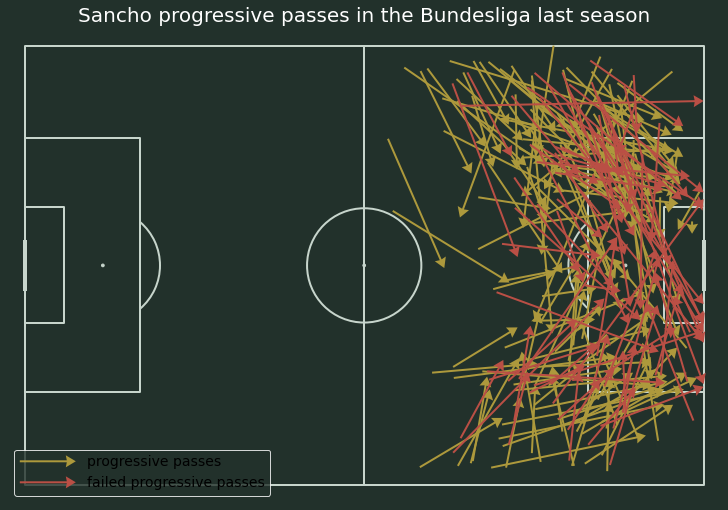

In [10]:
#Code to plot Sancho's progressive passes

pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

mask_incomplete = []
mask_prog = []
mask_complete = []
mask_prog_failed = []
#mask = mask_complete and mask_prog

for i in range(len(passes['X'])):
    if passes['isProgressive'].iloc[i]=='Yes':
        mask_prog.append(True)
    else:
        mask_prog.append(False)
        
    if passes['isProgressive'].iloc[i]=='Failed':
        mask_prog_failed.append(True)
    else:
        mask_prog_failed.append(False)
                     
# Plot the completed progressive passes 
pitch.arrows(passes[mask_prog].X, passes[mask_prog].Y,
             passes[mask_prog].endX, passes[mask_prog].endY, width=2,
             headwidth=6, headlength=5, color='#ad993c', ax=ax, label='progressive passes')

# Plot the failed progressive passes 
pitch.arrows(passes[mask_prog_failed].X, passes[mask_prog_failed].Y,
             passes[mask_prog_failed].endX, passes[mask_prog_failed].endY, width=2,
             headwidth=6, headlength=5, color='#ba4f45', ax=ax, label='failed progressive passes')
# setup the legend
ax.legend(facecolor='#22312b', handlelength=4, edgecolor='white', fontsize=14, loc='lower left')

# Set the title
ax.set_title('Sancho progressive passes in the Bundesliga last season', fontsize=20, color='White')